# MULTIPLE LINEAR REGRESSION


##### Objective
To predict the price of Toyota Corolla cars using multiple linear regression and understand how different attributes affect the price.

##### Dataset Description
The dataset includes features like Age, KM, HP, CC, Weight, Doors, FuelType, etc.


## 1. Exploratory Data Analysis

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [285]:
df=pd.read_csv(r"C:\Users\tilna\Downloads\Multiple Linear Regression\ToyotaCorolla - MLR.csv")

In [286]:
df.shape

(1436, 11)

In [287]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [289]:
# missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [290]:
#duplicatee values
df.duplicated().sum()

np.int64(1)

In [291]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [292]:
df.duplicated().sum()

np.int64(0)

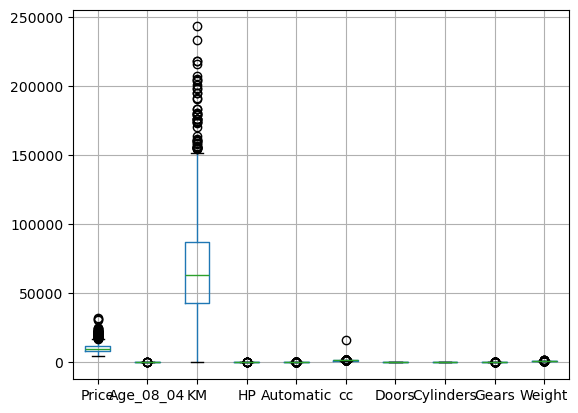

In [293]:
## checking outliers
df.boxplot()
plt.show()

In [294]:
# outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    low_ext=Q1-1.5*IQR
    upp_ext=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x: low_ext if x<low_ext else upp_ext if x>upp_ext else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

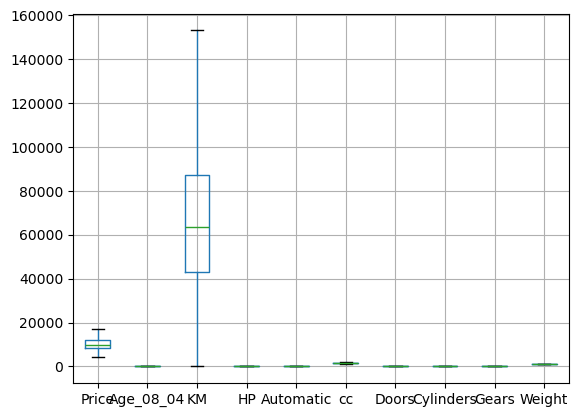

In [295]:
df.boxplot()
plt.show()

In [296]:
#summary statistics
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [297]:
# labeling categorical col
df['Fuel_Type'].value_counts()
df['Fuel_Type'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [298]:
df1=pd.get_dummies(df,dtype='int',drop_first=True)

In [299]:
# seprate target and features
target=df1[['Price']]
features=df1.drop(columns=['Price'])

In [300]:
from sklearn.feature_selection import f_regression

In [342]:
## instead of used f_regression to do feature selection

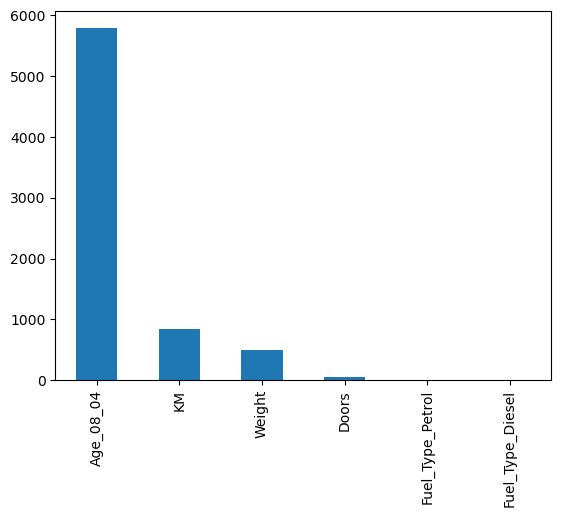

In [343]:
## feature selection
f_reg=f_regression(features,target)
f_scores=pd.Series(f_reg[0],index=features.columns)
f_scores.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [302]:
f_scores

Age_08_04           5790.997794
KM                   840.165852
HP                    99.182824
Automatic              0.000000
cc                    24.384714
Doors                 49.657937
Cylinders              0.000000
Gears                  0.000000
Weight               497.966391
Fuel_Type_Diesel       0.003573
Fuel_Type_Petrol       0.310225
dtype: float64

In [303]:
features=features.loc[:,f_scores>0]
features

,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,90.0,1900.0,3,1152.5,1,0
1,23.0,72937.0,90.0,1900.0,3,1152.5,1,0
2,24.0,41711.0,90.0,1900.0,3,1152.5,1,0
3,26.0,48000.0,90.0,1900.0,3,1152.5,1,0
4,30.0,38500.0,90.0,1900.0,3,1152.5,1,0
...,...,...,...,...,...,...,...,...
1430,69.0,20544.0,86.0,1300.0,3,1025.0,0,1
1431,72.0,19000.0,86.0,1300.0,3,1015.0,0,1
1432,71.0,17016.0,86.0,1300.0,3,1015.0,0,1
1433,70.0,16916.0,86.0,1300.0,3,1015.0,0,1


In [304]:
#multicolineaarity
vif=pd.DataFrame()
vif['features1']=features.columns
vif['vif_score']=[variance_inflation_factor(features.values,i) for i in range(len(features.columns))]
vif.sort_values(by='vif_score',ascending=False,ignore_index=True)

,features1,vif_score
0,cc,1097.417357
1,HP,603.971562
2,Weight,350.676252
3,Fuel_Type_Petrol,71.937653
4,Fuel_Type_Diesel,29.985486
5,Doors,21.319841
6,Age_08_04,17.476682
7,KM,9.644729


In [305]:
features=features.drop(columns=['cc','HP'])
features

,Age_08_04,KM,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23.0,46986.0,3,1152.5,1,0
1,23.0,72937.0,3,1152.5,1,0
2,24.0,41711.0,3,1152.5,1,0
3,26.0,48000.0,3,1152.5,1,0
4,30.0,38500.0,3,1152.5,1,0
...,...,...,...,...,...,...
1430,69.0,20544.0,3,1025.0,0,1
1431,72.0,19000.0,3,1015.0,0,1
1432,71.0,17016.0,3,1015.0,0,1
1433,70.0,16916.0,3,1015.0,0,1


## 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [306]:
# spliting training and testing data
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 6)
(287, 6)
(1148, 1)
(287, 1)


## 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [307]:
from sklearn.preprocessing import StandardScaler

In [308]:
#scaling the data
std_sca=StandardScaler()

### Model 1

In [344]:
## included all variable with train size 0.8

In [345]:
x_train[['KM','Weight']]=std_sca.fit_transform(x_train[['KM','Weight']])
x_test[['KM','Weight']]=std_sca.fit_transform(x_test[['KM','Weight']])

In [310]:
## data modelling using linear regression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [311]:
#coefficient
lin_reg.coef_

array([[-107.25720268, -545.66581731,  -90.82515358,  943.93900392,
        -571.70567122, 1058.35697458]])

In [312]:
#intercept
lin_reg.intercept_

array([15997.05773793])

### Model 2

In [313]:
## changed the train size to 0.7
x_train1,x_test1,y_train1,y_test1=train_test_split(features,target,train_size=0.7,random_state=100)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1004, 6)
(431, 6)
(1004, 1)
(431, 1)


In [314]:
x_train1[['KM','Weight']]=std_sca.fit_transform(x_train1[['KM','Weight']])
x_test1[['KM','Weight']]=std_sca.fit_transform(x_test1[['KM','Weight']])

In [315]:
lin_reg1=LinearRegression()
lin_reg1.fit(x_train1,y_train1)

LinearRegression()

In [316]:
#coefficient
lin_reg1.coef_

array([[-107.44588683, -504.30660938,  -96.79652883,  969.29285123,
        -399.49818606, 1402.71146462]])

In [317]:
#intercept
lin_reg1.intercept_

array([15660.19624253])

### model 3

In [318]:
### using 4 features
features1=features.drop(columns=['Weight','Fuel_Type_Petrol'])
features1

,Age_08_04,KM,Doors,Fuel_Type_Diesel
0,23.0,46986.0,3,1
1,23.0,72937.0,3,1
2,24.0,41711.0,3,1
3,26.0,48000.0,3,1
4,30.0,38500.0,3,1
...,...,...,...,...
1430,69.0,20544.0,3,0
1431,72.0,19000.0,3,0
1432,71.0,17016.0,3,0
1433,70.0,16916.0,3,0


In [319]:
x_train2,x_test2,y_train2,y_test2=train_test_split(features1,target,train_size=0.8,random_state=100)
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1148, 4)
(287, 4)
(1148, 1)
(287, 1)


In [320]:
x_train2[['KM']]=std_sca.fit_transform(x_train2[['KM']])
x_test2[['KM']]=std_sca.fit_transform(x_test2[['KM']])

In [321]:
lin_reg2=LinearRegression()
lin_reg2.fit(x_train2,y_train2)

LinearRegression()

In [322]:
lin_reg2.coef_

array([[-127.65213698, -526.22436673,  217.3968055 ,  -54.40203229]])

In [323]:
lin_reg2.intercept_

array([16773.73866699])

## 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

### Model 1

In [324]:
## train validation
y_pred=lin_reg.predict(x_train)
r2_score(y_train,y_pred)

0.8674293727626996

In [325]:
#test validation
y_pred1=lin_reg.predict(x_test)
r2_score(y_test,y_pred1)

0.8448339030147998

In [326]:
## Evaluation metrics
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
mae=mean_absolute_error(y_test,y_pred1)
print(f'MSE:{mse}')
print(f'RMSE:{rmse}')
print(f'MAE:{mae}')

MSE:1314826.717464196
RMSE:1146.6589368527139
MAE:844.2702710113746


### Model2

In [327]:
## train validation
y_pred_m2=lin_reg1.predict(x_train1)
r2_score(y_train1,y_pred_m2)

0.8661659894559142

In [328]:
#test validation
y_pred1_m2=lin_reg1.predict(x_test1)
r2_score(y_test1,y_pred1_m2)

0.8539226983121855

In [329]:
## Evaluation metrics of model2
mse1=mean_squared_error(y_test1,y_pred1_m2)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_test1,y_pred1_m2)
print(f'MSE:{mse1}')
print(f'RMSE:{rmse1}')
print(f'MAE:{mae1}')

MSE:1300218.4395751797
RMSE:1140.271213166052
MAE:849.9271840249874


### Model 3

In [330]:
## train validation
y_pred_m3=lin_reg2.predict(x_train2)
r2_score(y_train2,y_pred_m3)

0.830158071213315

In [331]:
#test validation
y_pred1_m3=lin_reg2.predict(x_test2)
r2_score(y_test2,y_pred1_m3)

0.827499805592982

In [332]:
## Evaluation metrics of model3
mse2=mean_squared_error(y_test2,y_pred1_m3)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(y_test2,y_pred1_m3)
print(f'MSE:{mse2}')
print(f'RMSE:{rmse2}')
print(f'MAE:{mae2}')

MSE:1461710.1852845356
RMSE:1209.0120699498975
MAE:894.2641746380831


## 5.Apply Lasso and Ridge methods on the model.

In [333]:
from sklearn.linear_model import Lasso,Ridge

#### Lasso

In [334]:
lasso=Lasso(alpha=1,max_iter=1000)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [335]:
lasso.coef_

array([-107.36506689, -546.47998055,  -86.99478755,  935.97162761,
       -556.97396484, 1047.94915362])

In [336]:
lasso.intercept_

array([15995.23448294])

In [337]:
lasso_ypred=lasso.predict(x_train)
lasso_ypred1=lasso.predict(x_test)
train_acc=r2_score(y_train,lasso_ypred)
test_acc=r2_score(y_test,lasso_ypred1)
print(f'Train Acc:{train_acc}\nTest Acc:{test_acc}')

Train Acc:0.8674253674594147
Test Acc:0.8449208135942978


#### Ridge

In [338]:
ridge=Ridge(alpha=1,max_iter=1000)
ridge.fit(x_train,y_train)

Ridge(alpha=1, max_iter=1000)

In [339]:
ridge.coef_


array([-107.32124106, -547.00653807,  -88.93411044,  938.42298271,
       -593.2019825 , 1019.75688344])

In [340]:
ridge.intercept_

array([16029.30481768])

In [341]:
ridge_ypred=ridge.predict(x_train)
ridge_ypred1=ridge.predict(x_test)
train_acc=r2_score(y_train,ridge_ypred)
test_acc=r2_score(y_test,ridge_ypred1)
print(f'Train Acc:{train_acc}\nTest Acc:{test_acc}')

Train Acc:0.8674263367667228
Test Acc:0.8448499358492616


## Conclusion:

### Interview Questions

#### Normalization & Standardization and how is it helpful

#### techniques can be used to address multicollinearity in multiple linear regression